# Fourier Transform

> My dad's favourite function (he is an engineer)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def format_plot(ax):
    # format axis to the middle
    
    for pos in ['left', 'bottom']:
        ax.spines[pos].set_position('zero')
        ax.spines[pos].set_color('black')
        ax.spines[pos].set_linewidth(0.5)
        # send the spine to the back
        ax.spines[pos].set_zorder(0)

    for pos in ['right', 'top']:
        ax.spines[pos].set_color('none')

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=6)
    ax.legend(loc=1, fontsize=8)
    ax.grid(color='gray', linestyle='dashed', linewidth=0.5)

## Interjection!

Let's study the Fourier Transform with everyone's favourite [3Blue1Brown](https://www.youtube.com/watch?v=spUNpyF58BY)

> I so regret not working harder on my math when I was younger ...

Additional resources:
- [Continuous-Time Vs Discrete-Time Sinusoidal Signal](https://www.tutorialspoint.com/continuous-time-vs-discrete-time-sinusoidal-signal#:~:text=A%20sinusoidal%20signal%20which%20is,the%20amplitude%20of%20the%20signal.)

**The Continuous-Time Sinusoidal Signal**

- Basically, any periodic signal can be expressed in this form to make analysis easier.

$x(t)=A sin(\omega t + \phi) = A sin(2\pi f t + \phi)$

|||
|-|-|
|$A$|Amplitude of the signal.|
|$\omega$|$2\pi f = \frac{2\pi}{T}$ angular frequency in radians per second, $T$ is the period.|
|$f$|Frequency in Hz (cycles per second).|
|$\phi$|Phase angle in radians / How far the function is shifted horizontally from the usual position (remember this is a sin function).|

In [4]:
def get_signal(t: np.array, f: int, A: float=1, p: float = 0):
    return A * np.sin(2 * np.pi * f * t + p)

We treat $\theta == t$, $t$ is time - notice how when we set $f = 1$, the period $T=1$. 

For $sin(\theta)$, the period is $T=2\pi$, which translates to $f=\frac{1}{2\pi}$.

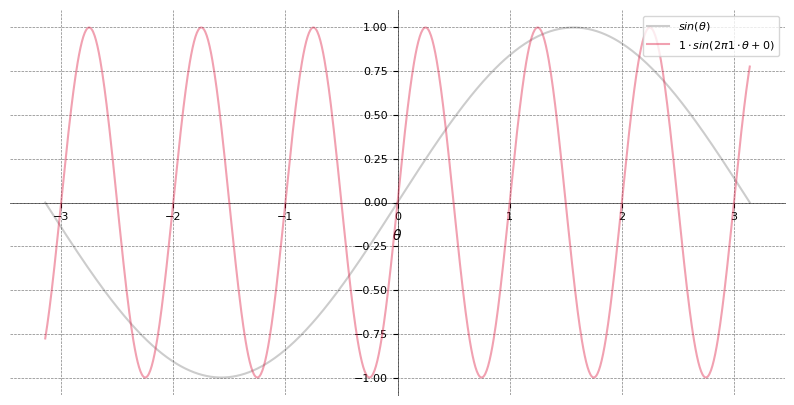

In [12]:
t = np.linspace(-np.pi, np.pi, 1000)
y_sin = np.sin(t)

# sinusoidal function
A = 1
f = 1 #1/(2*np.pi)
phi = 0
y_sinusoid = get_signal(t, f, A, phi)

_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t, y_sin, color='black', alpha=0.2, label='$sin(\\theta)$')


ax.plot(t, y_sinusoid, color='crimson', alpha=0.4, label=f"${{{A}}} \\cdot sin(2 \\pi {{{f}}} \\cdot \\theta + {{{phi}}})$")
ax.set_xlabel('$\\theta$')
format_plot(ax)
plt.show()

array([-5.70210263e+02, -5.51505183e+02, -5.31938948e+02, -5.11542110e+02,
       -4.90346516e+02, -4.68385264e+02, -4.45692646e+02, -4.22304094e+02,
       -3.98256130e+02, -3.73586304e+02, -3.48333135e+02, -3.22536057e+02,
       -2.96235351e+02, -2.69472084e+02, -2.42288045e+02, -2.14725683e+02,
       -1.86828034e+02, -1.58638660e+02, -1.30201578e+02, -1.01561190e+02,
       -7.27622185e+01, -4.38496312e+01, -1.48685742e+01,  1.41356995e+01,
        4.31179008e+01,  7.20327750e+01,  1.00835173e+02,  1.29480120e+02,
        1.57922888e+02,  1.86119066e+02,  2.14024626e+02,  2.41595993e+02,
        2.68790118e+02,  2.95564536e+02,  3.21877441e+02,  3.47687746e+02,
        3.72955148e+02,  3.97640195e+02,  4.21704341e+02,  4.45110011e+02,
        4.67820658e+02,  4.89800819e+02,  5.11016174e+02,  5.31433596e+02,
        5.51021203e+02,  5.69748411e+02,  5.87585977e+02,  6.04506048e+02,
        6.20482206e+02,  6.35489502e+02,  6.49504505e+02,  6.62505329e+02,
        6.74471676e+02,  

In [29]:
t = np.linspace(-np.pi, np.pi, 1000)

D294 = get_signal(1, 294, 1, 0)
A440 = get_signal(1, 440, 1, 0)
Pressure = D294 + A440
to_plot = {
    'Pressure': Pressure,
    'D294': D294,
    'A440': A440
}
_, ax = plt.subplots(len(to_plot), 1, figsize=(10, 3*len(to_plot)))
for ylabel, y in to_plot.items():
    ax.plot(t, y, label=ylabel)
    ax.set_xlabel('$\\theta$')
    format_plot(ax)
    
ax.plot(t, y_sin, color='black', alpha=0.2, label='$sin(\\theta)$')


# ax.plot(t, y_sinusoid, color='crimson', alpha=0.4, label=f"${{{A}}} \\cdot sin(2 \\pi {{{f}}} \\cdot \\theta + {{{phi}}})$")
# ax.set_xlabel('$\\theta$')
# format_plot(ax)
# plt.show()